# Posed as a challenge on reddit/r/python. I'll clean it up soon!

## The challenge was presented as follows:

>Our goal is calculate pi (the irrational number, if you're not familiar with the notion of pi) but we must do it a very specific way. First, we construct an algorithm that plots n points in quadrant one, between 0 and 1. In other words, each n will have an $(x, y)$ where x and y both range from 0 to 1. Now, we construct an algorithm to find out whether that point is above or below $\sqrt{(1-x^2)}$. At this point, we are less concerned about the values (in fact, we are entirely disconcerned with the values), we need only a number of points below $\sqrt{(1-x^2)}$...we'll call this nBelow. Now, if we take the ratio of $\frac{nBelow}{n}$...we should get $\frac{\pi}{4}$ as the total number of points get large. Multiplying this by 4, we should get $\pi$. The main idea is that as n goes to infinity, $\frac{nBelow}{n} = \frac{\pi}{4}$. Now we need to graph this. The graph will have 0 - 1000000, or possibly bigger if the program needs more values to properly converge, on the x-axis and $log10(|1-(\frac{x}{\pi})|)$ on the y-axis. The x in the logarithm is the 4 times $\frac{nBelow}{n}$ which equals $\pi$.

Hope this helps!

In [65]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

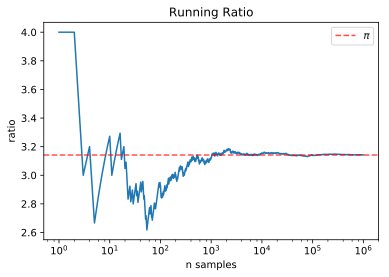

In [66]:
n_samples = 1000000

# generate random points from 0 to 1
x = np.random.rand(n_samples)
y = np.random.rand(n_samples)

# determine whether the point falls in the unit circle (algebra)
in_circle = y < np.sqrt(1 - x**2)

# calculate the running ratio of how many points fall in the circle
running_ratio = in_circle.cumsum().astype(float) / np.arange(1, len(in_circle) + 1)


# plot it
domain = np.arange(1, n_samples + 1)
plt.semilogx(running_ratio * 4)
plt.xlabel('n samples')
plt.ylabel('ratio')
plt.axhline(np.pi, c='red', linestyle='--', alpha=.7, label=r'$\pi$')
plt.title('Running Ratio')
plt.legend()
plt.show()

So far so good, the ratio of points above and below the line, times 4, is converging on pi :-)

Now lets plug it into the second formula (a loss function) $log_{10}(|1 - \frac{ratio}{\pi}| )$.

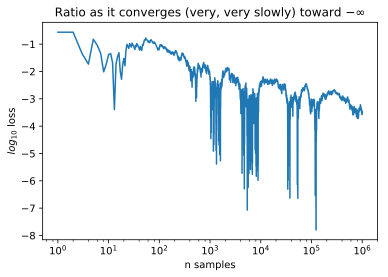

In [67]:
log_10_loss = np.log10(np.abs(1 - (running_ratio * 4) / np.pi))

plt.semilogx(log_10_loss)
plt.xlabel('n samples')
plt.ylabel(r'$log_{10}$ loss')
plt.title(r'Ratio as it converges (very, very slowly) toward $-\infty$')
plt.show()

The results of plugging the ratios into the formula are a bit underwhelming, but such is the nature of logs. If we are within .0001 of $\pi$, the y value is only -4.

The weird icicle sections come from the ratio oscillating around pi. When the $\frac{\text{ratio}}{\pi}$ is VERY close to 1, we are essentially taking $log_{10}$ of 0 which is $-\infty$. So the y value shoots down and back up again as it crosses the axis. We can still see that the general trend, though, is for the value to decrease at a logrithmic rate.